This is a Thinkful practice for fixing the homoscedasticity and multivariate normality assumptions. The data used for this practice is from the course material. 

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [14]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
#data['exp_sales'] = [math.exp(x) for x in  data['Sales']]
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


### Fixing Homoscedasticity

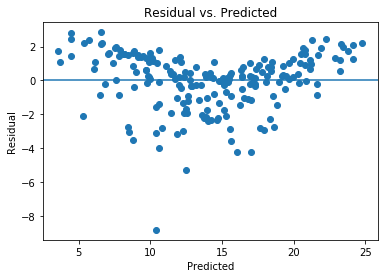

In [15]:
# Extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

From above graphic, we see that the data have homoscedasticity, which the residual does not evenly distribute across the line on both side. Therefore, we will look for a way to transoform our data. Next, we will look at the relationship between our features and outcome. 

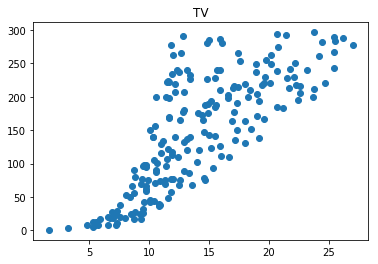

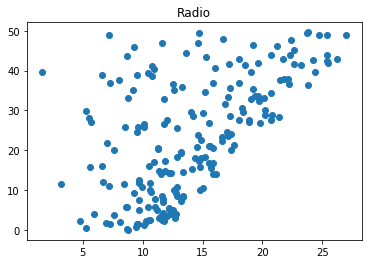

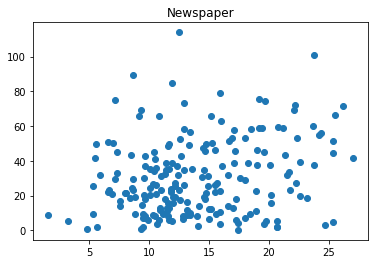

In [16]:
plt.scatter(data['Sales'], data['TV'])
plt.title('TV')
plt.show()

plt.scatter(data['Sales'], data['Radio'])
plt.title('Radio')
plt.show()

plt.scatter(data['Sales'], data['Newspaper'])
plt.title('Newspaper')
plt.show()

According to above scatter plots, we see that our features are not completely linear to our outcome. Next, we will try to transform our features, and see if this will help our regression model. 

In [30]:
data['exp_TV'] = [math.exp(x) for x in  data['TV']]
data['exp_Radio'] = [math.exp(x) for x in  data['Radio']]
data['exp_Newspaper'] = [math.exp(x) for x in  data['Newspaper']]

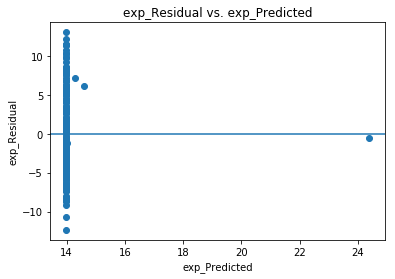

In [34]:
exp_X = data[['exp_TV', 'exp_Radio', 'exp_Newspaper']]

exp_predicted = regr.predict(exp_X).ravel()
exp_actual = data['Sales']

# Calculate the error, also called the residual.
exp_residual = exp_actual - exp_predicted

plt.scatter(exp_predicted, exp_residual)
plt.xlabel('exp_Predicted')
plt.ylabel('exp_Residual')
plt.axhline(y=0)
plt.title('exp_Residual vs. exp_Predicted')
plt.show()

Our first attempt, taking the exp of our features does not help fix the Homoscedasticity issue here. Next, we can try different transformation. 

In [37]:
data['sqrt_TV'] = [np.sqrt(x) for x in  data['TV']]
data['sqrt_Radio'] = [np.sqrt(x) for x in  data['Radio']]
data['sqrt_Newspaper'] = [np.sqrt(x) for x in  data['Newspaper']]

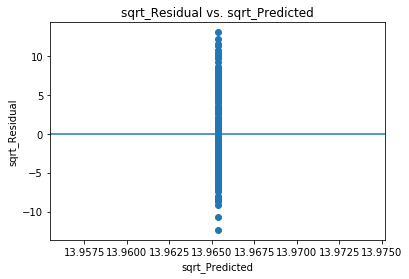

In [39]:
X_2 = data[['sqrt_TV', 'sqrt_Radio', 'sqrt_Newspaper']]

sqrt_predicted = regr.predict(X_2).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
sqrt_residual = actual - sqrt_predicted

plt.scatter(sqrt_predicted, sqrt_residual)
plt.xlabel('sqrt_Predicted')
plt.ylabel('sqrt_Residual')
plt.axhline(y=0)
plt.title('sqrt_Residual vs. sqrt_Predicted')
plt.show()

Taking the square root does not make it any better either. Next, let's try combining the original feature with the exp features. 

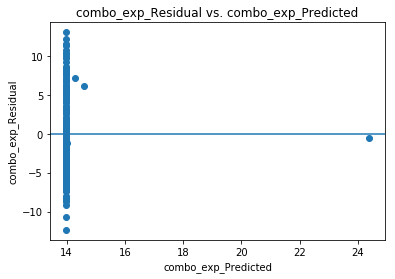

In [42]:
combo_exp_X = data[['TV','Radio','Newspaper','exp_TV','exp_Radio','exp_Newspaper']]

combo_exp_regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper','exp_TV','exp_Radio','exp_Newspaper']]
combo_exp_regr.fit(X, Y)

combo_exp_predicted = combo_exp_regr.predict(combo_exp_X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
combo_exp_residual = actual - combo_exp_predicted

plt.scatter(combo_exp_predicted, combo_exp_residual)
plt.xlabel('combo_exp_Predicted')
plt.ylabel('combo_exp_Residual')
plt.axhline(y=0)
plt.title('combo_exp_Residual vs. combo_exp_Predicted')
plt.show()

Too bad. It did not work either. 

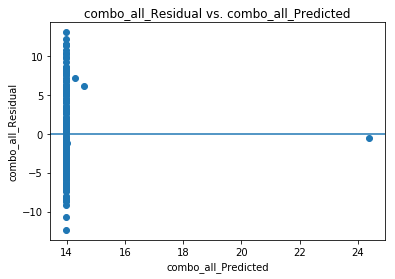

In [44]:
combo_all_X = data[['TV','Radio','Newspaper','exp_TV','exp_Radio','exp_Newspaper','sqrt_TV','sqrt_Radio','sqrt_Newspaper']]

combo_all_regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper','exp_TV','exp_Radio','exp_Newspaper','sqrt_TV','sqrt_Radio','sqrt_Newspaper']]
combo_all_regr.fit(X, Y)

combo_all_predicted = combo_all_regr.predict(combo_all_X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
combo_all_residual = actual - combo_all_predicted

plt.scatter(combo_all_predicted, combo_all_residual)
plt.xlabel('combo_all_Predicted')
plt.ylabel('combo_all_Residual')
plt.axhline(y=0)
plt.title('combo_all_Residual vs. combo_all_Predicted')
plt.show()

So I give up here.

### Multivariate Normality

 Next, let's see if a simple exp tramformation will help us make the variances normally distributed. 

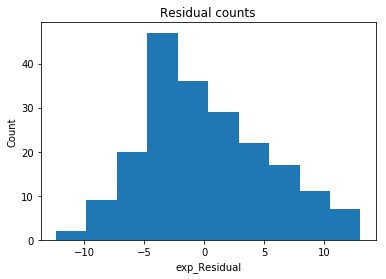

In [45]:
plt.hist(exp_residual)
plt.title('Residual counts')
plt.xlabel('exp_Residual')
plt.ylabel('Count')
plt.show()

Actually a simple exp transformation will help normalized the variances of our model. 